# Structural estimation of dynamic models

QuantEcon-RSE Intensive Course on Computational Modeling

December 16-20, 2019, RSE, ANU

**Day 5**

Fedor Iskhakov

<img src="_static/lecture.png" style="width:64px;">

## Plan for the day

1. Cake eating and consumption-savings problems  
1. Function interpolation  
1. Solving the Bellman equation with fitted VFI  
1. Checking the quality of the numerical solution  
1. Estimating parameters of the model with MSM  


MSM = method of simulated moments

## Cake eating problem

<img src="_static/cake.png" style="width:96px;">

  
- Cake of initial size $ M_0 $  
- How much of the cake to eat each period $ t $, $ c_t $?  
- Time is discrete, horizon is infinite $ t=1,2,\dots,\infty $  
- What is not eaten in period $ t $ is left for the future $ M_{t+1}=M_t-c_t $  

### How to specify a dynamic model?

- Preferences of the decision maker
  - Utility flow from cake consumption
  - Discount factor  
- Choices of the decision maker
  - How much cake to eat  
- State space of the problem
  - A full list of variables that are relevant to the choices in question  
- Beliefs of the decision agents about how the state will evolve
  - Transition density/probabilities of the states
  - May be conditional on the choices  

### Preferences in the cake eating

Let the flow utility be given by

$$
u(c_{t})=\log(c_t)
$$

The goal is to maximize the discounted expected lifetime utility

$$
\max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t})
\longrightarrow \max
$$

### Recursive form of the dynamic optimization problem

$$
\begin{eqnarray*}
  V(M_{0}) & = & \max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t}) \\
  & = & \max_{0 \le c_{0}\le M_0}\{u(c_{0})+\beta\max_{\{c_{t}\}_{1}^{\infty}}\sum_{t=1}^{\infty}\beta^{t-1}u(c_{t})\} \\
  & = & \max_{0 \le c_{0}\le M_0}\{u(c_{0})+\beta V(M_{1})\}
\end{eqnarray*}
$$

$$
V(M_{0})=\max_{0 \le c_{0} \le M_{0}}\big\{u(c_{0})+\beta V(M_{1})\big\}
$$

### Value function

**Value function** $ V(M_t) $ = the maximum attainable
value given the size of cake $ M_t $ (in period $ t $)

- State space is given by single variable $ M_t $  
- Transition of the variable (**rather, beliefs**) depends on the choice  


$$
M_{t+1}=M_t-c_t
$$

### Bellman equation/operator

- Bellman equation has all relevant model parts, and thus fully specifies the model  
- *Equation* when thought of as point-wise equality of two functions  


$$
V(M_{t})=\max_{0 \le c_{t} \le M_t}\big\{u(c_{t})+\beta V(\underset{=M_{t}-c_{t}}{\underbrace{M_{t+1}}})\big\}
$$

- *Operator* when thought of as map that takes one (value) function as input
  (it goes to the RHS), and returns another (value) function  


$$
T(f)(M)=\max_{0 \le c \le M}\big\{u(c)+\beta f(\underset{=M-c}{\underbrace{M'}})\big\}
$$

### Recap: What are the components of the model?

- **State variables** — vector of variables that describe all relevant
  information about the modeled decision process  
- **Decision variables** — vector of variables describing the choices, along
  with restrictions on the choice set  
- **Instantaneous payoff** — utility function, with
  time separable discounted lifetime (overall) utility  
- **Motion rules** — agent’s beliefs of how state variable evolve
  through time, conditional on choices  

### Recap: What is the solution of the model?

- **Value function** — maximum attainable lifetime utility, fixed point of the Bellman operator  
- **Policy function** — mapping from state space to action space that
  results in maximum lifetime utility (the optimal choice)  

### From cake eating to consumption-savings

$$
V(M_{t})=\max_{0 \le c_{t} \le M_t}\big\{u(c_{t})+\beta V\big(\underset{=M_{t+1}}{\underbrace{R(M_{t}-c_{t})+y}}\big)\big\}
$$

*What has changed?*

### Consumption-savings problem (Deaton model)

New interpretation:

- Wealth in the beginning of the period $ M_t $  
- Consumption at period $ t $ is $ 0 \le c_t \le M_t $  
- No borrowing is allowed  
- Discount factor $ \beta $, time separable utility $ u(c_t) $  
- Gross return on savings $ R $, risk free  
- Constant income $ y \ge 0 $  


For cake eating problem we have $ R=1 $ and $ y=0 $.

### Solving consumption-savings model

Standard contraction theory (Blackwell conditions and Banach theorem) **applies**
$ \Rightarrow $

1. Value function iterations (VFI)  


- Also known as successive approximations of the value function  
- Including interpolation of value function (fitted VFI)  
- May include different treatments of continuous choice variables  


1. Other solution methods?  

### Additional material: many other solution methods!

1. VFI: solving maximization in RHS of the Bellman equation  
1. Time iterations: solving first order conditions instead of maximization  
1. Policy iterations: applying Newton method for solving for the fixed point  
1. Endogenous gridpoint method: avoiding iterative solution in the Bellman equation  


All methods iterate on time (aka backwards induction)

## Function interpolation

- $ f(x) $ is function of interest, hard to compute  
- 
  <dl style='margin: 20px 0;'>
  <dt>Have data on values of $ f(x) $ in $ n $ points</dt>
  <dd>
  $ (x_1,\dots,x_n) $  
  </dd>
  
  </dl>
  


$$
f(x_1), f(x_2), \dots f(x_n)
$$

- 
  <dl style='margin: 20px 0;'>
  <dt>Need to find the approximate value of the function $ f(x) $ in</dt>
  <dd>
  arbitrary points $ x \in [x_1,x_n] $  
  </dd>
  
  </dl>

### Approaches

1. Use *piece-wise* approach (connect the dots)  


- choice of functional form to use for connections  
- *linear interpolation* is typical approach  


1. Use a *similar* function $ s(x) $ to represent $ f(x) $
  between the data points  


- harder choice of functional form  
- which data should be used for the approximation  
- *polynomial approximation* is typical approach  

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate # Interpolation routines

np.random.seed(173) # fix random number sequences
x=np.sort(np.random.uniform(0,10,12)) # sorted random numbers on [0,10]
func=lambda x: np.exp(-x/4)*np.sin(x) # function to interpolate

def plot1(ifunc,tfunc=func,fdata=(x,func(x)),color='b',title=''):
    '''helper function to make illustrations'''
    xd = np.linspace(0,10,1000) # dense grid for continuous lines
    plt.figure(num=1, figsize=(10,8))
    if tfunc: plt.plot(xd,tfunc(xd),color='grey') # true function
    plt.scatter(fdata[0],fdata[1],color='r') # interpolation data
    if ifunc:
        try:
            plt.plot(xd,ifunc(xd),color=color)
        except(ValueError):
            # catch the exprapolation error
            xd=xd[np.logical_and(xd>=fdata[0][0],xd<=fdata[0][-1])] # remove outside points
            plt.plot(xd,ifunc(xd),color=color)
    if title: plt.title(title)

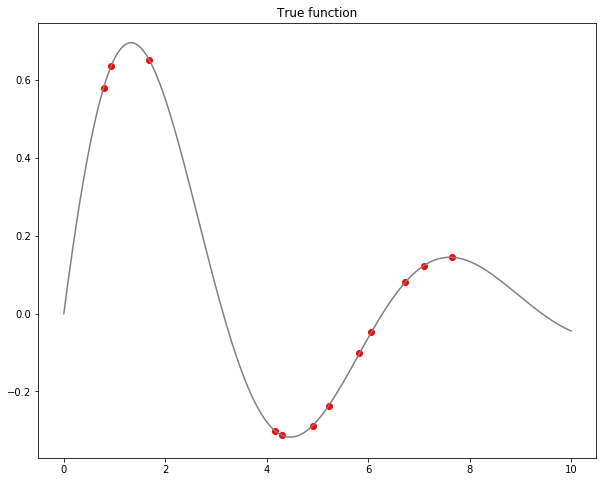

In [27]:
plot1(None,title='True function')

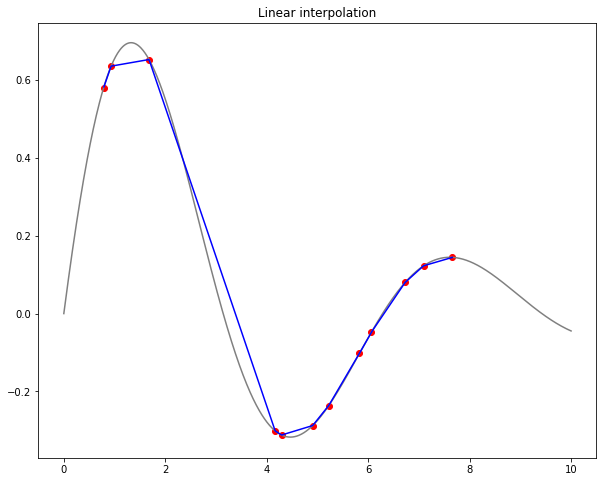

In [28]:
fi = interpolate.interp1d(x,func(x)) # returns the interpolation function
plot1(fi,title='Linear interpolation')

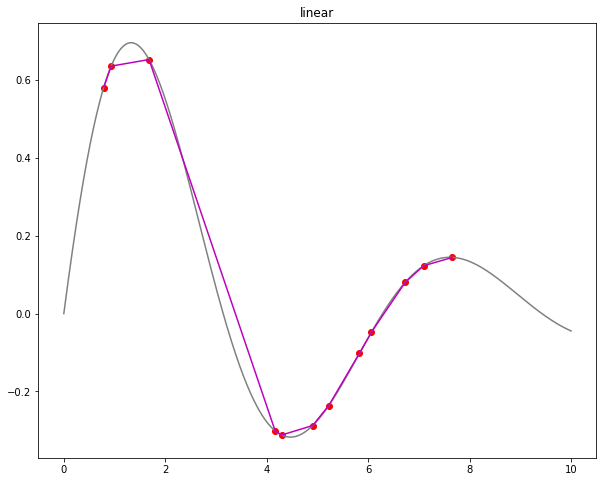

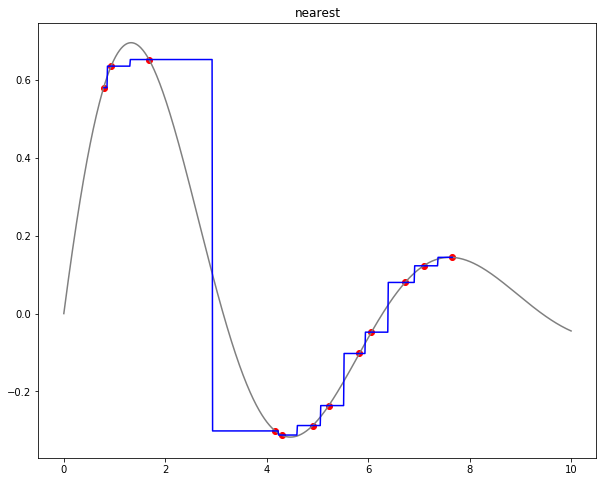

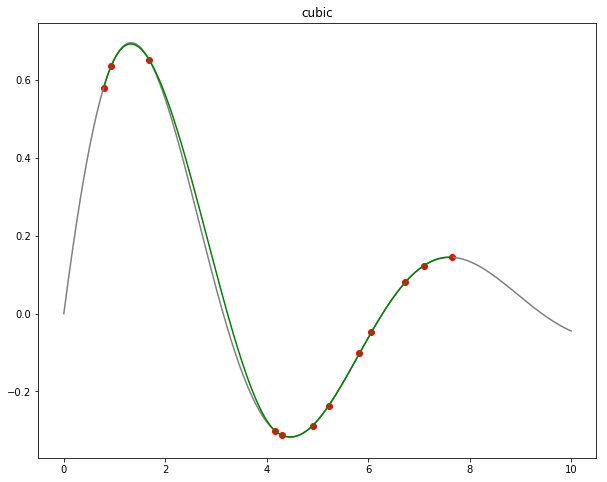

In [29]:
for knd, clr in ('linear','m'),('nearest','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd)
    plot1(fi,title=knd,color=clr)
    plt.show()

Max errors from smallest to largest:
linear     0.286774717136552
cubic      0.336857702962370
nearest    0.580692500331825


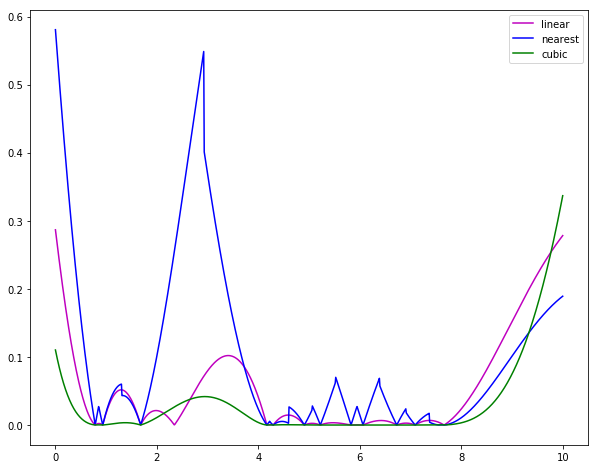

In [30]:
# Approximation errors
# x=np.sort(np.random.uniform(0,10,15))  # generate new data
maxerr={}
for knd, clr in ('linear','m'),('nearest','b'),('cubic','g'):
    fi = interpolate.interp1d(x,func(x),kind=knd,bounds_error=False,fill_value="extrapolate")
    xd = np.linspace(0,10,1000)
    erd=np.abs(func(xd)-fi(xd))
    plt.figure(num=1, figsize=(10,8))
    plt.plot(xd,erd,color=clr,label=knd)
    maxerr[knd]=np.nanmax(erd)
plt.legend()
print('Max errors from smallest to largest:') #sort maxerr on the fly
for k, v in sorted(maxerr.items(), key=lambda item: item[1]):
    print('%-10s %1.15f'%(k,v))
# How to reduce approximation errors?

### Accuracy of the interpolation

- Number of nodes  
- Location of nodes  
- Different functions require different approximation methods  


*In economic models we usually can choose all of these, subject to computational cost*

## Fitted value function iterations

**Algorithm**

1. Start with an arbitrary guess $ V_0(M) $  (as we know from contraction mapping theory the initial guess is not important)  
1. At each iteration $ i $ compute  
  $$
  \begin{eqnarray*}
  V_i(M) = T(V_{i-1})(M) &=&
  \max_{0 \le c \le M} \big\{u(c)+\beta V_{i-1}\big(R(M-c)+y\big) \big \}  \\
  c_{i-1}(M) &=&
  \underset{0 \le c \le M}{\arg\max} \big\{u(c)+\beta V_{i-1}\big(R(M-c)+y\big) \big \}
  \end{eqnarray*}
  $$
1. Repeat until convergence  

### Numerical implementation of the Bellman operator

- Cake/wealth is continuous $ \rightarrow $ value function is a function of continuous variable  
- How to represent a continuous function on a computer?  
- Solution: *discretize* $ M $ = Construct a *grid* (vector) of levels of wealth (cake sizes) $ \vec{M}\in\{0,\dots\overline{M}\} $  


$$
V_{i}(\vec{M})=\max_{0 \le c \le \vec{M}}\{u(c)+\beta V_{i-1}\big(R(\vec{M}-c)+y\big)\}
$$

- Compute value function and policy function sequentially point-by-point  
- May need to compute the value function *between grid points* $ \Rightarrow $ Interpolation of value function  

### How to treat the continuous choice variable?

Several approaches are possible:

- Employ numerical optimization routine to compute $ \max\{\bullet\} $  
- Solve first order conditions of the maximization problem  
- Discretize choice space similarly to the state space  


*What are the pros and cons of each approach?*

### Discretized consumption choice

*Control for grid over state space separately from the discretization of
the choice variables to increase accuracy*

- Discretized state space $ \vec{M}\in\{0,\dots\overline{M}\} $  
- Discretize decision space with
  $ \vec{C}\in\{0,\dots\overline{C}\} $, usually
  $ \overline{C}=\overline{M} $  


Bellman equation becomes for all $ m \in \vec{M} $

$$
V_{i}(m)=\max_{c \in \vec{C}: c \le m}\{u(c)+\beta V_{i-1}\big(R(m-c)+y\big)\}
$$

### Final algorithm with discretized state and choice

1. Fix the grids $ \vec{M} $ and $ \vec{C} $ over the state and choice space  
1. Start with an arbitrary guess $ V_0(M) $  (as we know from contraction mapping theory the initial guess is not important)  
1. At each iteration $ i $ and each $ m \in \vec{M} $ compute  
  $$
  \begin{eqnarray*}
  V_i(M) = T(V_{i-1})(M) &=&
  \max_{c \in \vec{C}: c \le \vec{M}}\big\{u(c)+\beta V_{i-1}\big(R(\vec{M}-c)+y\big)\big\} \\
  c_{i-1}(M) &=&
  \underset{c \in \vec{C}: c \le \vec{M}}{\arg\max} \big\{u(c)+\beta V_{i-1}\big(R(\vec{M}-c)+y\big)\big\}
  \end{eqnarray*}
  $$


1. Repeat until convergence  


*Note interpolation of value function :math:`V_{i-1}(bullet)` and maximization over finite set*

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

class deaton():
    '''Implementation of the Deaton consumption-savings problem with income.
    '''
    def __init__(self,
                 beta=.9,
                 R=1.05,
                 y=1,
                 Mbar=10,
                 ngrid_state=50,
                 ngrid_choice=100,
                 interpolation='linear'):
        self.beta = beta    # Discount factor
        self.Mbar = Mbar    # Upper bound on wealth
        self.R = R          # Gross interest
        self.y = y          # Income level
        self.ngrid_state = ngrid_state    # Number of grid points for wealth
        self.ngrid_choice = ngrid_choice  # Number of grid points for consumption
        self.epsilon = np.finfo(float).eps # smallest positive float number
#         self.epsilon = 0.0 # for testing and debugging
        self.grid_state = np.linspace(self.epsilon,Mbar,ngrid_state) # grid for state space
        self.grid_choice = np.linspace(self.epsilon,Mbar,ngrid_choice) # grid for decision space
        self.interpolation = interpolation # interpolation type for Bellman equation

    def u(self,c):
        '''Utility function'''
        return np.log(c)

    def mu(self,c):
        '''Marginal utility function'''
        return 1/c

    def imu(self,u):
        '''Inverse marginal utility function'''
        return 1/u

    def next_period_wealth(self,M,c):
        '''Next period budget, vectorized'''
        assert isinstance(M, float) or M.shape == c.shape, 'Shape of M and c must be the same'
        return self.R*(M-c) + self.y

    def interpolate(self,x,f):
        '''Returns the interpolation function for given data'''
        if self.interpolation=='linear':
            return interpolate.interp1d(x,f,kind='slinear',fill_value="extrapolate")
        elif self.interpolation=='quadratic':
            return interpolate.interp1d(x,f,kind='quadratic',fill_value="extrapolate")
        elif self.interpolation=='cubic':
            return interpolate.interp1d(x,f,kind='cubic',fill_value="extrapolate")
        else:
            print('Unknown interpolation type')
            return None

    def bellman_discretized(self,V0):
        '''Bellman operator with discretized choice,
           V0 is 1-dim vector of values on grid
        '''
        M = np.repeat(np.reshape(self.grid_state,(1,-1)),self.ngrid_choice,0) # matrix with state space repeated in rows
        c = np.repeat(np.reshape(self.grid_choice,(-1,1)),self.ngrid_state,1) # decisions grid repeated by columns
        # What does the next line do???
#         c *= np.reshape(self.grid_state,(1,-1)) /self.Mbar
        # compute wealth in the next period
        nxM = self.next_period_wealth(M,c)
        mask = c<=M # mask off infeasible choices
#         print('M=',M,sep='\n') # debugging and testing
#         print('c=',c,sep='\n')
#         print('nxM=',nxM,sep='\n')
#         print('mask=',mask,sep='\n')
        # interpolate values of next period value at next period case sizes
        inter = self.interpolate(self.grid_state,V0)
        nxV = inter(nxM) # value of next period wealth
        # construct the matrix with maximand of the Bellman equation
        preV1 = np.full((self.ngrid_choice,self.ngrid_state),-np.inf) # init V with -inf
        preV1[mask] = self.u(c[mask]) + self.beta*nxV[mask]
        # find optimal choice
        V1 = np.amax(preV1,axis=0,keepdims=False) # maximum in every column
        c1 = c[np.argmax(preV1,axis=0),range(self.ngrid_state)] # choose the max attaining levels of c
        return V1, c1

    def solve_vfi (self, maxiter=100, tol=1e-4, callback=None):
        '''Solves the model using successive approximations
        '''
        V0=self.u(self.grid_state) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman_discretized(V0)
            if callback: callback(iter,self.grid_state,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1

    def solve_egm (self, maxiter=100, tol=1e-4, callback=None):
        '''Solver the model using endogenous gridpoint method
        '''
        A = np.linspace(0,self.Mbar,self.ngrid_state) # grid over savings
        zz = np.zeros(self.ngrid_state) # vector of zeros
        gr1 = np.array([0,self.Mbar]) # grid of two points
        c1 = np.array([0,self.Mbar]) # on first iteration assume consuming everything
        for iter in range(maxiter):
            # EGM step
            nxM = self.next_period_wealth(A,zz) # next period M
            inter = self.interpolate(gr1,c1) # interpolate current policy function
            nxc = inter(nxM) # consumption next period
            c0 = np.empty(self.ngrid_state+1) # one extra point
            gr0 = np.empty(self.ngrid_state+1) # one extra point
            c0[0] = 0.
            c0[1:] = self.imu(self.beta*self.R*self.mu(nxc)) # consumption this period
            gr0[0] = 0
            gr0[1:] = c0[1:] + A
            if callback: callback(iter,gr0,np.full(gr0.shape,np.nan),c0) # callback for making plots
            # interpolate old policy on new grid
            dev = np.abs( inter(gr0[1:]) - c0[1:] )
            if np.all(dev) < tol and iter>maxiter/2:   # FIXME
                break
            gr1 = gr0
            c1 = c0
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        # reinterpolate to the state grid for convenience
        inter = self.interpolate(gr0,c0)
        c = inter(self.grid_state)
        return [],c

    def solve_plot(self, solver_name='vfi', **kvarg):
        '''Illustrate solution
           Inputs: solver (string), and any inputs to the solver
        '''
        if solver_name=='egm':
            solver = self.solve_egm
        else:
            solver = self.solve_vfi
        fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
        ax1.grid(b=True, which='both', color='0.65', linestyle='-')
        ax2.grid(b=True, which='both', color='0.65', linestyle='-')
        ax1.set_title('Value function convergence with %s'%solver_name)
        ax2.set_title('Policy function convergence with %s'%solver_name)
        ax1.set_xlabel('Cake size, W')
        ax2.set_xlabel('Cake size, W')
        ax1.set_ylabel('Value function')
        ax2.set_ylabel('Policy function')
        def callback(iter,grid,v,c):
            print('.',end='')
            ax1.plot(grid[1:],v[1:],color='k',alpha=0.25)
            ax2.plot(grid,c,color='k',alpha=0.25)
        V,c = solver(callback=callback,**kvarg)
        # add solutions
        if any(V): ax1.plot(self.grid_state[1:],V[1:],color='r',linewidth=2.5)
        if any(c): ax2.plot(self.grid_state,c,color='r',linewidth=2.5)
        plt.show()
        return V,c

In [32]:
# study the mechanics of the Bellman calculation: uncomment debugging and testing
model = deaton(ngrid_state=5,ngrid_choice=8)
V,c = model.solve_vfi(maxiter=1)

No convergence: maximum number of iterations achieved!


.....................................

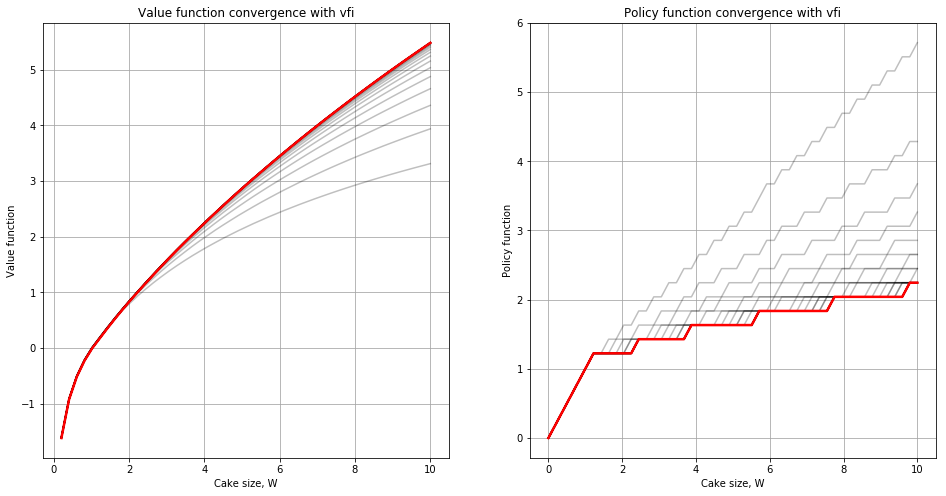

In [33]:
model = deaton(beta=0.92,Mbar=10,ngrid_state=50,ngrid_choice=50)
V,c = model.solve_plot() # make convergence plot

## Accuracy of the numerical solution

Before attempting to estimate structural parameters it is useful to verify
that our numerical solution method produces correct solution for the problem.
How?

- Compare against solution on a much denser grid, which would be otherwise impractical to use  
- Compare solutions from several independent solution methods to each other  
- Maybe there is an analytic solution for a special case?  
  - Cake-eating model has one!  
  - The case when $ \beta R = 1 $ resulting in perfect consumption smoothing  

### Analytic solution to the cake eating problem

- Cake eating problem ($ R=1 $, $ y=0 $) with $ u(c)=\log(c) $  
- Start with a (good) guess of $ V(M)=A+B\log M $, and write the Bellman equation as  
  $$
  \begin{eqnarray*}
  V(M) & = & \max_{c}\big\{u(c)+\beta V(M-c)\big\} \\
  A+B\log M & = & \max_{c} \big\{\log c+\beta(A+B\log (M-c)) \big\}
  \end{eqnarray*}
  $$
- Determine $ A $ and $ B $ and find the optimal rule for cake consumption.  
- This is only possible in **few** models!  

F.O.C. for $ c $

$$
\frac{1}{c} - \frac{\beta B}{M - c} = 0, \quad c = \frac {M} {1 + \beta B}, M - c = \frac {\beta B M} {1 + \beta B}
$$

Then we have

$$
A + B\log M = \log M + \log\frac{1}{1+\beta B} +
\beta A + \beta B \log M + \beta B \log\frac{\beta B}{1+\beta B}
$$

$$
\begin{eqnarray*}
A &=& \beta A + \log\frac{1}{1+\beta B} + \beta B \log\frac{\beta B}{1+\beta B} \\
B &=& 1 + \beta B
\end{eqnarray*}
$$

After some algebra

$$
c^{\star}(M) =  \frac {M} {1 + \beta B} = \frac {M} {1 + \frac{\beta}{1-\beta}} = (1-\beta)M
$$

$$
V(M) = \frac{\log(M)}{1-\beta} + \frac{\log(1-\beta)}{1-\beta} + \frac{\beta \log(\beta)}{(1-\beta)^2}
$$

In [34]:
def check_analytic(model,V=None,policy=None):
    '''Check the cake eating numerical solution against the analytic solution'''
    # analytic solution
    assert model.R==1 and model.y==0, 'Only makes sense for cake eating model, must have R=1 and y=0'
    assert V is not None and policy is not None, 'Solution must be given'
    aV = lambda w: np.log(w)/(1 - model.beta) + np.log(1 - model.beta)/(1 - model.beta) + model.beta* np.log(model.beta)/((1 - model.beta)**2)
    aP = lambda w: (1 - model.beta) * w
    grid = model.grid_state
    # make plots
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
    ax1.grid(b=True, which='both', color='0.65', linestyle='-')
    ax2.grid(b=True, which='both', color='0.65', linestyle='-')
    ax1.set_title('Value functions')
    ax2.set_title('Policy functionas')
    ax1.set_xlabel('Cake size, W')
    ax2.set_xlabel('Cake size, W')
    ax1.set_ylabel('Value function')
    ax2.set_ylabel('Policy function')
    ax1.plot(grid[1:],V[1:],linewidth=1.5,label='Numerical')
    ax1.plot(grid[1:],aV(grid[1:]),linewidth=1.5,label='Analytical')
    ax2.plot(grid,policy,linewidth=1.5,label='Numerical')
    ax2.plot(grid,aP(grid),linewidth=1.5,label='Analytical')
    ax1.legend()
    ax2.legend()
    plt.show()

..........................................................................................................................................................

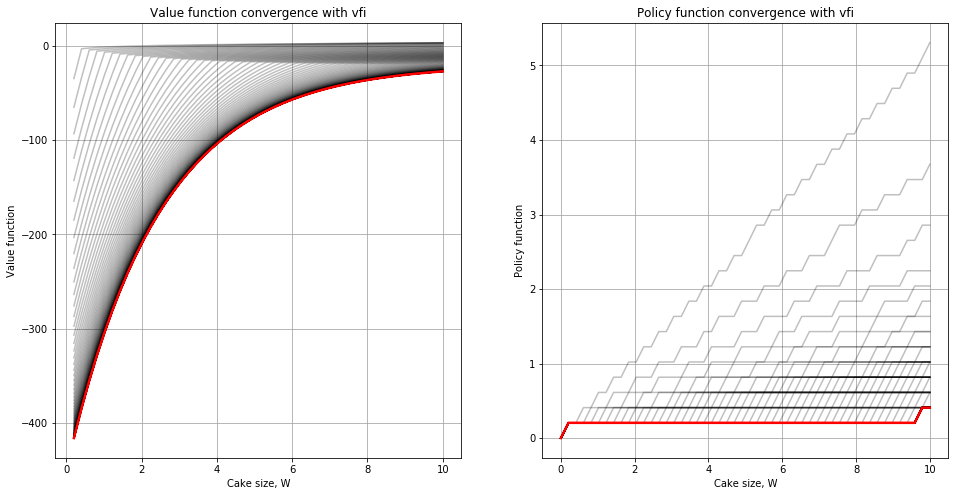

In [35]:
model = deaton(beta=0.92,R=1,y=0,Mbar=10,ngrid_state=50,ngrid_choice=50)
V,c = model.solve_plot(maxiter=1000)

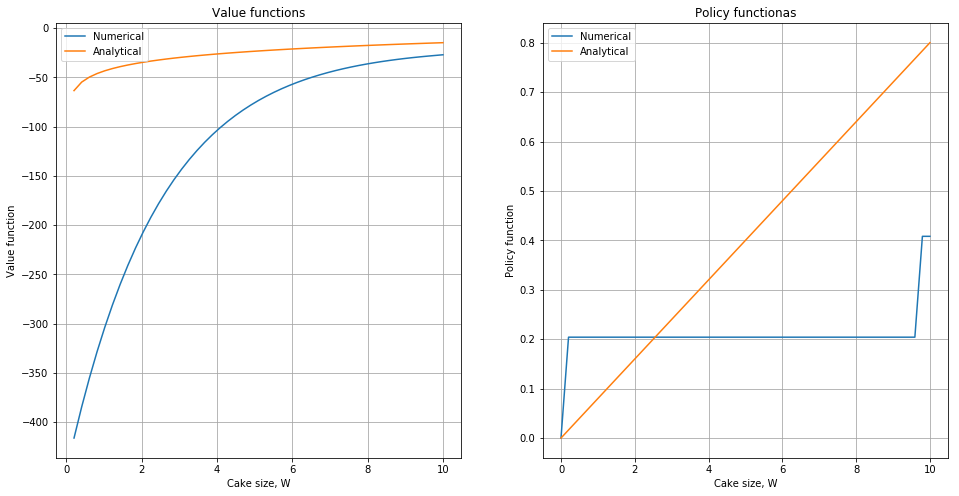

In [36]:
check_analytic(model,V=V,policy=c)

## Simulating from the model

- When the policy function (optional consumption rule) $ c^\star(M) $ is computed and plugged into the Bellman equation, we have a dynamic model *(similar to the inventory or wealth dynamics, see day 3)*  
- Given any initial distribution of wealth, we can simulate it in any number periods under the optimal consumption/savings behavior  
- We can also study dynamics of wealth distribution implied by the optimal consumption/savings behavior  

### Simulation algorithm

1. Draw initial wealth (initial conditions)  
1. Apply the policy function  
1. Compute the next period wealth (including random transitions if present)  
1. Repeat from step 2 for the chosen number of periods  

### Introduce random element into the model

- Let income $ y $ be drawn from log-normal distributions in each time period  
- Simulate the behavior of the agents in this environment using our solution of the consumption-savings model  


*What behavior assumptions are we making implicitly?*

In [37]:
def simulator(model, policy, init=[1], T=100, sigma_y=0.,plot=True):
    '''Simulator for T periods of the model, init = initial wealth'''
    assert isinstance(model,deaton), 'Need Deaton model as first input'
    # prepare the interpolation for the solution
    inter = interpolate.interp1d(model.grid_state,policy,fill_value="extrapolate")
    # prepare the initial conditions
    init = np.array(init).flatten()
    N = init.size # number of individuals to simulate
    sim = {'M': np.empty((N,T),dtype='float'),
           'c': np.empty((N,T),dtype='float'),
           'y': np.empty((N,T),dtype='float'),}
    # initialize wealth in first period
    sim['M'][:,0] = init
    sim['y'][:,0] = np.full(init.shape,np.nan)
    for t in range(T):
        sim['c'][:,t] = inter(sim['M'][:,t]) # optim consumption
        if t < T-1: # until the last period
            y = np.exp(sigma_y * np.random.randn(N)) # draw incomes
            sim['y'][:,t+1] = y
            sim['M'][:,t+1] = model.R*(sim['M'][:,t]-sim['c'][:,t]) + y # compute next period wealth
    if plot:
        fig, ax = plt.subplots(1,1,figsize=(10,8))
        ax.plot(np.transpose(sim['M']))
        ax.set_title('Simulated wealth paths');
        plt.show()
    return sim

No convergence: maximum number of iterations achieved!


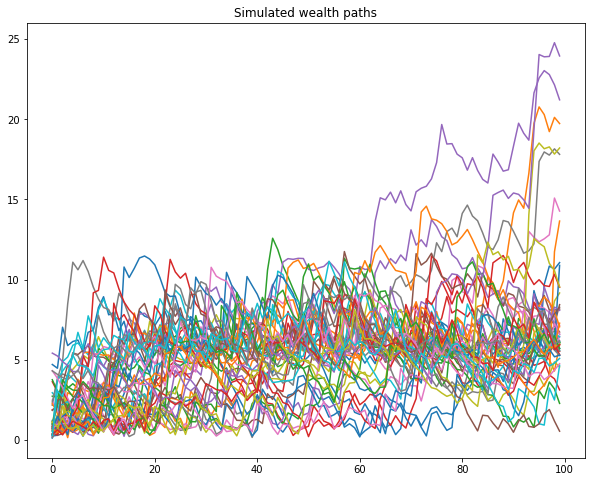

In [38]:
model = deaton(beta=0.95,y=1,Mbar=30,ngrid_state=50,ngrid_choice=50)
V,policy = model.solve_vfi()
np.random.seed(14) # fix seed for initial draws
init_wealth = np.exp(np.random.randn(50)) # draw initial wealth
np.random.seed(15) # fix seed for simulations
d=simulator(model,policy,init=init_wealth,sigma_y=.65)

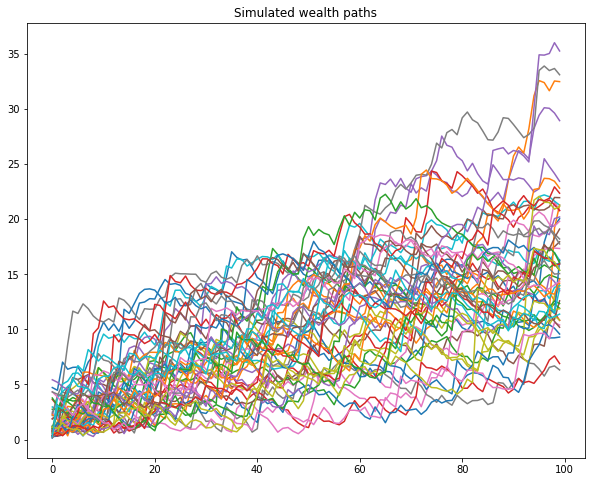

In [39]:
# solve with different method for checking
V2,policy2 = model.solve_egm()
np.random.seed(15) # fix seed for simulations
d2=simulator(model,policy2,init=init_wealth,sigma_y=.65)
# Why do simulations look different??

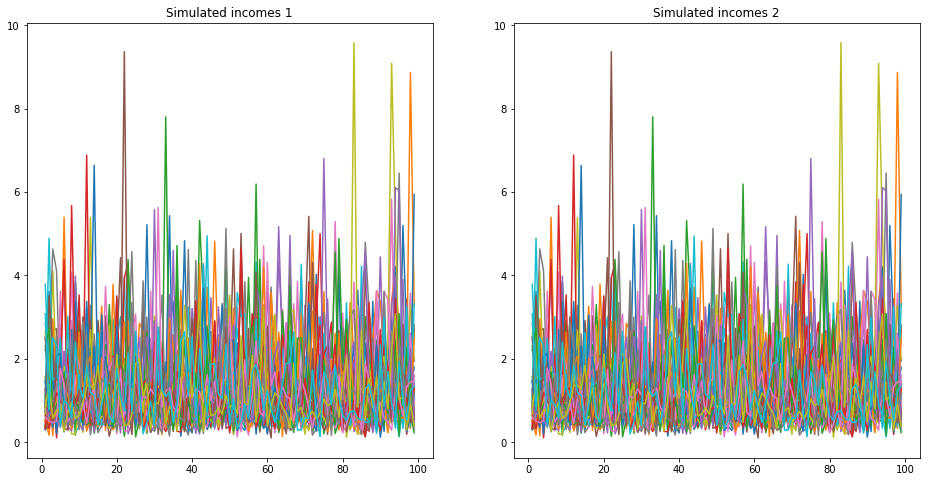

In [40]:
# draw simulated inomes
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.plot(np.transpose(d['y']))
ax1.set_title('Simulated incomes 1');
ax2.plot(np.transpose(d2['y']))
ax2.set_title('Simulated incomes 2');
plt.show()

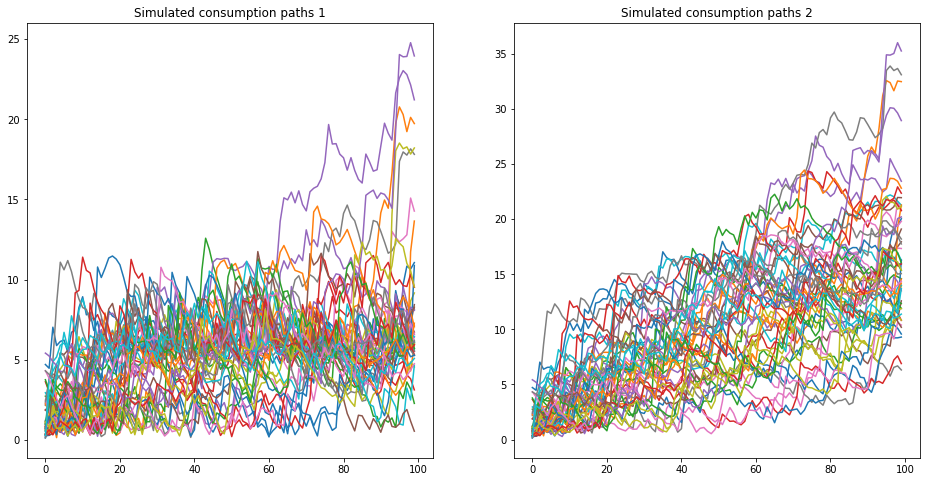

In [41]:
# draw simulated consumption
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.plot(np.transpose(d['M']))
ax1.set_title('Simulated consumption paths 1');
ax2.plot(np.transpose(d2['M']))
ax2.set_title('Simulated consumption paths 2');
plt.show()

## Structural estimation

Changing parameters of the model is reflected in changes in the simulated profiles.

Imagine we have data on observed consumption or wealth profiles for a sample of people.

Can find parameters of the model that would induce the simulated data to reflect the observed data in the best possible way.

### Method of simulated moments

The idea of *directly* matching simulated data to the observed one leads to the method of moments estimator

- Method of moments: # of parameters = # of moments to match, system of equations  
- Generalized method of moments (GMM): # of parameters < # of moments, minimize the distance between the data moments and theoretical moments  
- Method of simulated moments (MSM): using simulations to compute the theoretical moments  

### MSM properties

MSM is very flexible in applications:

- not data hungry (may match aggregated moments)  
- allows to combine different sources of data  
- does not require complete specification for random variables  
- lacks in efficiency, so standard errors are larger (depend on sample size)  

### Sources of identification

Parameters are identified from both

1. the variation of the observed data  
1. modeling assumptions such as **exclusion restrictions**, **functional forms** and **distributional assumptions**  


This is true for both *reduced form* econometrics and *structural econometrics*,
although the former usually emphasizes low number of assumptions and low importance of 2.

### Structural vs. reduced form econometrics

Compared to reduced form, structural econometrics is very explicit of the assumptions
in the model (and is often criticized for excessive number or unreasonable assumptions)

But it uses **economic theory** to formulate the assumptions, and is able to leverage theoretical knowledge for making predictions

### Counterfactual simulations

1. Estimate the model using observed data  
1. Verify the model (highly desirable step, not always possible)  
1. Simulate data under status quo  
1. Change the policy environment, while deep behavioral parameters are unaffected  
1. Simulate data under alternative regime  
1. Compare to reveal the effects of the policy  

### MSM estimator

**Algorithm**

1. Choose the set of statistics (moments) to match  
  - Choosing which moments to match is more art than science  
  - Requirement: have to lead to identification of parameters  
  - Economic intuition  
1. For a given set of structural parameters:  
1. Solve the model  
1. Simulated data from the model  
1. Compute model conditions = differences between the  

### Standard errors of estimates

- Each estimation method produces measure of accuracy of the computed estimates  
- Idea: this is reflected in the flatness of the criterion function at the optimum  
- Theoretical foundation in asymptotic theory, standard in econometrics  
- Not hard to compute, apart from degenerate cases  
- Is also a numerical diagnostic tool for potential problems with the model, such as identification  

### Definition of MSM estimator

$$
\hat{\theta}_{MSM} = \arg\min_{\theta} e(\tilde{x},x|\theta)^{T} W e(\tilde{x},x|\theta)
$$

$ x $ and $ \tilde{x} $ is observed and simulated data,

$ e(\tilde{x},x|\theta) $ is the difference between observed and simulated moments

$$
e(\tilde{x},x|\theta) = m(x) - m(\tilde{x}|\theta),
$$

$ W $ is weighting matrix (important for the efficiency of the estimator)

### Estimation exercise

- Structural parameter: is discount factor $ \beta $ (true value 0.91)  
- Moments to match: mean and standard deviation of the (stationary) wealth distribution  
- Use simplest identity weighting matrix $ W $ for now  
  - In reality it would make sense to weight down the moments which are poorly measured in the data  
  - There is a theory of what the optimal weighting matrix should be, but in practice a simpler approximations are usually used  
- Income is drawn from log-normal distribution with $ sigma_y=0.65 $, but agents are myopic about income uncertainty  

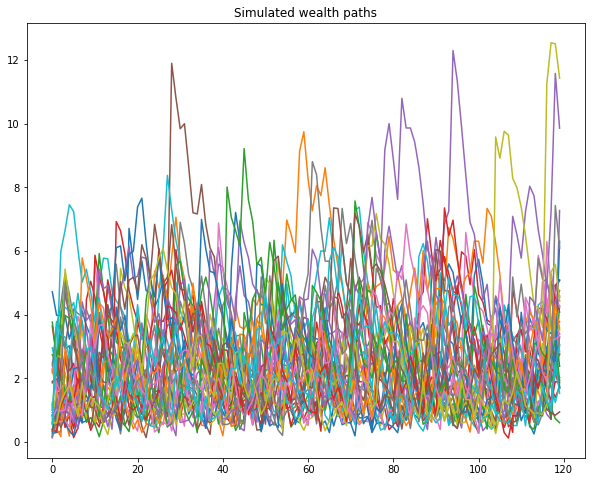

In [42]:
# Simulate DATA using true parameters
model = deaton(beta=0.91,y=1,Mbar=30,ngrid_state=50,ngrid_choice=50)
[],dgp = model.solve_egm()
np.random.seed(14) # fix seed for initial draws
init_wealth = np.exp(np.random.randn(40)) # draw initial wealth
np.random.seed(15) # fix seed for simulations
data = simulator(model,dgp,init=init_wealth,T=120,sigma_y=.65)

In [43]:
# Data moments
print('Number of observed individuals: ',data['M'].shape[0],sep=' ')
print('Number of observed time periods:',data['M'].shape[1],sep=' ')
data_mean = np.mean(data['M'][:,-10:])
data_std = np.std(data['M'][:,-10:])
print('Mean wealth (pooled over last 10 simulated time periods):  ',data_mean,sep=' ')
print('Std of wealth (pooled over last 10 simulated time periods):',data_std,sep=' ')

Number of observed individuals:  40
Number of observed time periods: 120
Mean wealth (pooled over last 10 simulated time periods):   2.7972296467122306
Std of wealth (pooled over last 10 simulated time periods): 1.830066902287776


In [44]:
# MSM estimation exercise
model = deaton(beta=0.95,y=1,Mbar=30,ngrid_state=100,ngrid_choice=250)
np.random.seed(214) # different seed from DGP
init_wealth = np.exp(np.random.randn(150)) # draw initial wealth
W = np.eye(2) #weighting matrix

def moment_conditions(beta):
    '''Moment conditions for MSM estimator'''
    model.beta = beta
    np.random.seed(215) # must be fixed between calls!
    v,p = model.solve_vfi(maxiter=1000)
    simdata = simulator(model,p,init=init_wealth,T=125,sigma_y=.65,plot=False)
    #compute simulated moments
    simdata_mean = np.mean(simdata['M'][:,-10:])
    simdata_std = np.std(simdata['M'][:,-10:])
    err = np.array([data_mean-simdata_mean, data_std-simdata_std])
    return err

def criterion(beta):
    '''Criterion function for MSM estimator'''
    err = moment_conditions(beta)
    return err @ W @ err.T #matrix multiplication

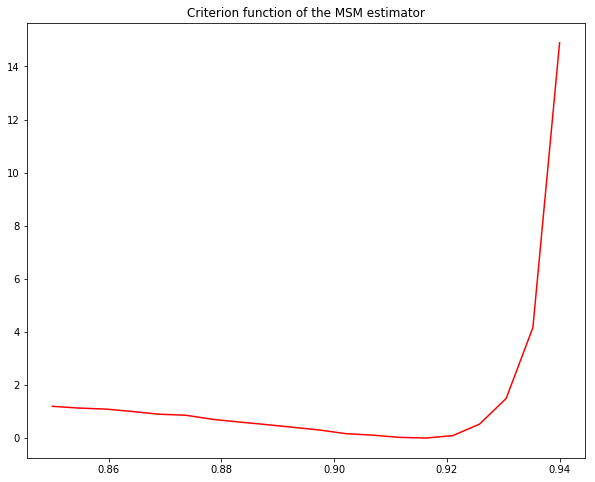

In [45]:
# Plot criterion for visual inspection
xd = np.linspace(.85,.94,20)
yd = [criterion(b) for b in xd]
plt.figure(num=1, figsize=(10,8))
plt.plot(xd,yd,color='r')
plt.title('Criterion function of the MSM estimator');

In [46]:
# Run numerical optimization
from scipy.optimize import minimize_scalar

res = minimize_scalar(criterion,
                      method='Bounded',
                      bounds=[.85,.95],
                      options={'maxiter':100, 'xatol':1e-8},
                      )
if res.success:
    print('Converged successfully!')
    print(res)
    beta_hat = res.x
else:
    print('Failed to converge')

Converged successfully!
     fun: 0.003175103310643658
 message: 'Solution found.'
    nfev: 27
  status: 0
 success: True
       x: 0.9151011391823893


### Calculating the variance-covariance matrix for the estimates

Daniel McFadden. A method of simulated moments for estimation of discrete response models without numerical integration. Econometrica, 1989 (pages 995–1026)

Ariel Pakes and David Pollard. Simulation and the Asymptotics of Optimization Estimators. Econometrica, 1989 (pp. 1027-1057)

- The asymptotic theory is well established, but full expressions are cumbersome  
- When weighting matrix $ W $ is identity matrix, the variance-covariance matrix of the estimates is given by  


$$
\hat{\Sigma} = (1-N/\tilde{N}) \big(D' D \big)^{-1},
$$

$ N $ and $ \tilde{N} $ are number of observations and number of simulations

$ D $ is the Jacobian of the moment conditions $ e(\tilde{x},x|\theta) $ with respect to $ \theta $ computed at a consistent estimator

In [47]:
# Compute numerical derivatives of the moment conditions
h = 1e-4
f0 = moment_conditions(beta_hat)
f1 = moment_conditions(beta_hat-h)
D = (f0-f1)/h
N = data['M'].shape[0]
Nt = init_wealth.size
Sigma = (1-N/Nt)/(np.dot(D,D))
beta_std = np.sqrt(Sigma)
#Main output:
print('Final estimate is ',beta_hat,' (',beta_std,')')

Final estimate is  0.9151011391823893  ( 0.0019301055269819942 )


### This is only a short introduction..

To complete MSM:

- more accurate weighting matrix  
- iterative procedure to recompute the weighting matrix using the current consistent (but not efficient) MSM estimator  
- better founded choice of moments to match  
- identification analysis (including manual simulations)  
- obvious extension to multiple structural parameters  

### Further on structural estimation

Steps we didn’t cover today:

1. Model design  
1. Better solution methods (speed and accuracy!)  
1. Model specification choice and verification  
1. Identification analysis  
1. Alternative estimators  
1. Counterfactual simulations (main goal!)  

## Further learning resources

<img src="_static/KeaneBFItalk.png" style="">

- [https://www.youtube.com/watch?v=0hazaPBAYWE&t=2s](https://www.youtube.com/watch?v=0hazaPBAYWE&t=2s)  
- [https://notes.quantecon.org/submission/5b3db2ceb9eab00015b89f93](https://notes.quantecon.org/submission/5b3db2ceb9eab00015b89f93)  